# Data Import

In [23]:
import pandas as pd
df = pd.read_csv("/Users/anthonymoubarak/Desktop/Time_Series/Project/Data/Rotten Tomatoes/rotten_tomatoes_movies.csv")
df = df[['original_release_date' ,  'tomatometer_rating']]
df.head()

,original_release_date,tomatometer_rating
0,2010-02-12,49.0
1,2010-04-30,87.0
2,1979-10-05,67.0
3,1957-04-13,100.0
4,1954-01-01,89.0


In [25]:
bom = pd.read_csv("/Users/anthonymoubarak/Desktop/Time_Series/Project/Data/BoxOfficeMojo/box_office_mojo_cleaned.csv")
bom = bom[['top10_gross' , 'weekend']]

In [26]:
import pandas as pd
import datetime

# Assuming df is your DataFrame
# Convert the 'original_release_date' column to datetime objects
df['original_release_date'] = pd.to_datetime(df['original_release_date'], errors='coerce')

# Function to convert date to the desired format
def convert_date(date):
    try:
        # Extract year, month, and calculate week of the month
        year = date.year
        month = date.strftime("%b")  # Abbreviated month name
        week_of_month = (date.day - 1) // 7 + 1
        
        # Format and return the new date string
        return f"{year}_{month}_w{week_of_month}"
    except:
        # Return a placeholder for NaT or other invalid values
        return None

# Apply the function to the 'original_release_date' column
df['original_release_date'] = df['original_release_date'].apply(convert_date)


In [27]:
df

,original_release_date,tomatometer_rating
0,2010_Feb_w2,49.0
1,2010_Apr_w5,87.0
2,1979_Oct_w1,67.0
3,1957_Apr_w2,100.0
4,1954_Jan_w1,89.0
...,...,...
17707,1981_Oct_w1,56.0
17708,2016_Mar_w1,98.0
17709,1964_Dec_w3,80.0
17710,1964_Jun_w3,96.0


In [29]:
joined_df = bom.merge(df , left_on=['weekend'] , right_on=['original_release_date'] , how = 'left')
joined_df.head(6)

,top10_gross,weekend,original_release_date,tomatometer_rating
0,"$72,719,625",1984_Dec_w4,1984_Dec_w4,36.0
1,"$451,773",1984_Dec_w4,1984_Dec_w4,36.0
2,"$290,196",1984_Dec_w3,1984_Dec_w3,85.0
3,"$290,196",1984_Dec_w3,1984_Dec_w3,70.0
4,"$290,196",1984_Dec_w3,1984_Dec_w3,25.0
5,"$49,021,775",1984_Dec_w3,1984_Dec_w3,85.0


In [30]:
average_ratings = joined_df.groupby(['weekend', 'top10_gross'])['tomatometer_rating'].mean().reset_index()
average_ratings

,weekend,top10_gross,tomatometer_rating
0,1977_Aug_w1,"$7,195,573",NaN
1,1977_Aug_w2,"$6,705,755",81.0
2,1977_Aug_w3,"$5,908,751",100.0
3,1977_Aug_w4,"$5,239,535",NaN
4,1977_Aug_w5,"$7,737,847",NaN
...,...,...,...
2762,2023_Oct_w4,-,NaN
2763,2023_Sep_w1,"$81,687,685",NaN
2764,2023_Sep_w2,"$56,042,286",NaN
2765,2023_Sep_w3,"$42,349,485",NaN


<Axes: >

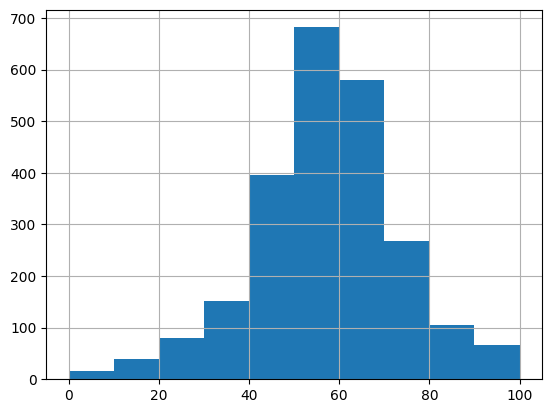

In [36]:
average_ratings.dropna(subset=['tomatometer_rating'])['tomatometer_rating'].hist()

In [37]:
# Replace NaN with median 

median_rating = joined_df['tomatometer_rating'].median()

# Replace NaN values in 'tomatometer_rating' with the median
joined_df['tomatometer_rating'].fillna(median_rating, inplace=True)

# Group by 'weekend' and 'top10_gross', and calculate the average 'tomatometer_rating'
average_ratings = joined_df.groupby(['weekend', 'top10_gross'])['tomatometer_rating'].mean().reset_index()


In [38]:
average_ratings

,weekend,top10_gross,tomatometer_rating
0,1977_Aug_w1,"$7,195,573",62.0
1,1977_Aug_w2,"$6,705,755",81.0
2,1977_Aug_w3,"$5,908,751",100.0
3,1977_Aug_w4,"$5,239,535",62.0
4,1977_Aug_w5,"$7,737,847",62.0
...,...,...,...
2762,2023_Oct_w4,-,62.0
2763,2023_Sep_w1,"$81,687,685",62.0
2764,2023_Sep_w2,"$56,042,286",62.0
2765,2023_Sep_w3,"$42,349,485",62.0


In [39]:
# Convert top 10 gross to int

average_ratings['top10_gross'] = average_ratings['top10_gross'].replace('-', pd.NA)

# Remove the dollar sign and commas, and convert to integer
average_ratings['top10_gross'] = average_ratings['top10_gross'].str.replace('$', '').str.replace(',', '').astype('Int64')


/var/folders/r_/fklxc5m54kl125_d3kkyjzp40000gn/T/ipykernel_2492/1979966556.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  average_ratings['top10_gross'] = average_ratings['top10_gross'].str.replace('$', '').str.replace(',', '').astype('Int64')


In [40]:
average_ratings

,weekend,top10_gross,tomatometer_rating
0,1977_Aug_w1,7195573,62.0
1,1977_Aug_w2,6705755,81.0
2,1977_Aug_w3,5908751,100.0
3,1977_Aug_w4,5239535,62.0
4,1977_Aug_w5,7737847,62.0
...,...,...,...
2762,2023_Oct_w4,<NA>,62.0
2763,2023_Sep_w1,81687685,62.0
2764,2023_Sep_w2,56042286,62.0
2765,2023_Sep_w3,42349485,62.0


In [44]:
average_ratings['top10_gross']#[2766]

0        7195573
1        6705755
2        5908751
3        5239535
4        7737847
          ...   
2762        <NA>
2763    81687685
2764    56042286
2765    42349485
2766        <NA>
Name: top10_gross, Length: 2767, dtype: Int64

In [46]:
# Calculate the median of 'top10_gross', excluding <NA> values
median_top10_gross = average_ratings['top10_gross'].median()

# Replace <NA> values in 'top10_gross' with the median
average_ratings['top10_gross'].fillna(median_top10_gross, inplace=True)

In [51]:
average_ratings.to_csv("gross_vs_rtscore.csv")